# Customer Segmentation using K-Means Clustering, Hierarchical Clustering and DBSCAN

# Problem statements
1. Customer Segmentation using K-Means Clustering 
2. Customer Segmentation using Hierarchical Clustering
3. Customer Segmentation using DBSCAN

# Dataset Description
- Mall Customers data from Kaggle
- Segmenting customers into different clusters.
- The result could be a reference for merchants or shops for understanding the comsumption of the customers.
- Description of the columns in the dataset:
1. CustomerID: This column contains unique identification numbers assigned to each customer in the dataset.
2. Genre: This column specifies the gender of each customer, with values either "Male" or "Female".
3. Age: This column represents the age of each customer, indicating their years of existence.
4. Annual Income(k$): This column denotes the yearly income of each customer, measured in thousands of dollars.
5. Spending Score (1-100): This column indicates the spending score of each customer, ranging from 1 to 100, reflecting their propensity to spend.

# Data Exploration

In [151]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from matplotlib import style
style.use('dark_background')

In [152]:
df = pd.read_csv('Downloads/Mall_Customers.csv',header=0)

In [153]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [154]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [156]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


([<matplotlib.patches.Wedge at 0x1a59f9d3730>,
 [Text(-0.4122389082750271, 2.161031948515388, 'Female'),
  Text(0.41223890827502735, -2.161031948515388, 'Male')],
 [Text(-0.22485758633183295, 1.1787446991902115, '56%'),
  Text(0.2248575863318331, -1.1787446991902115, '44%')])

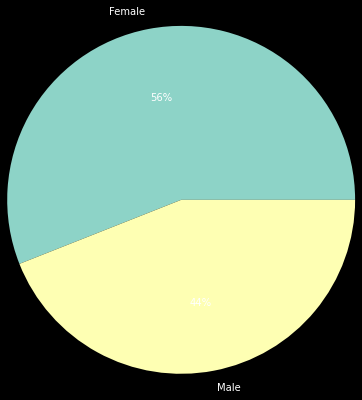

In [157]:
plt.pie(x=df['Genre'].value_counts(), labels = df['Genre'].value_counts().index,radius=2, autopct="%1.0f%%")

The numbers of Female are more than Male in this dataset.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

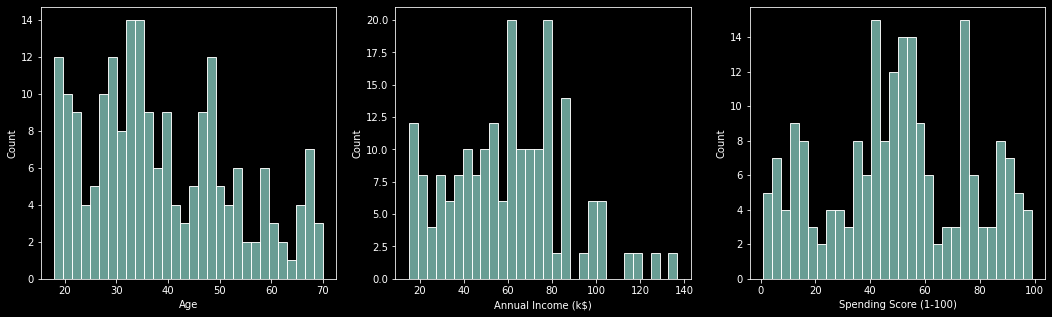

In [158]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(ax=axes[0], data=df, x=df['Age'], bins=30)
sns.histplot(ax=axes[1], data=df, x=df['Annual Income (k$)'], bins=30)
sns.histplot(ax=axes[2], data=df, x=df['Spending Score (1-100)'], bins=30)

In [159]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

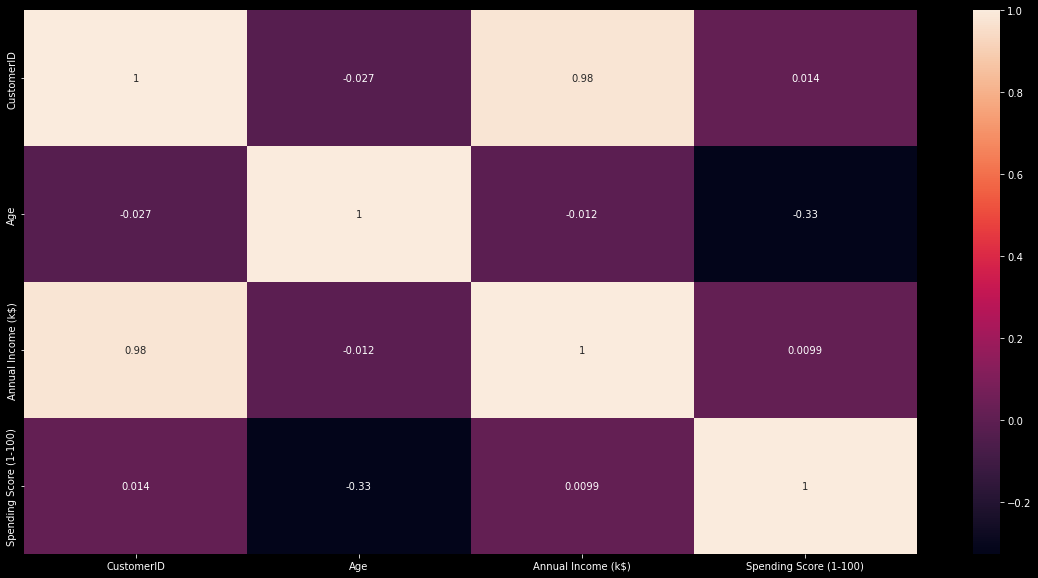

In [160]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot= True)

Most of the correlated relationships is weak, and there are some negative correlated relationships in the dataset.

# K-Means Clustering 

In [161]:
X = df.iloc[:,3:].values
print(X.shape)

(200, 2)


In [162]:
# Data standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Using Elbow method to find the optimal number of clusters

In [163]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\ckaha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


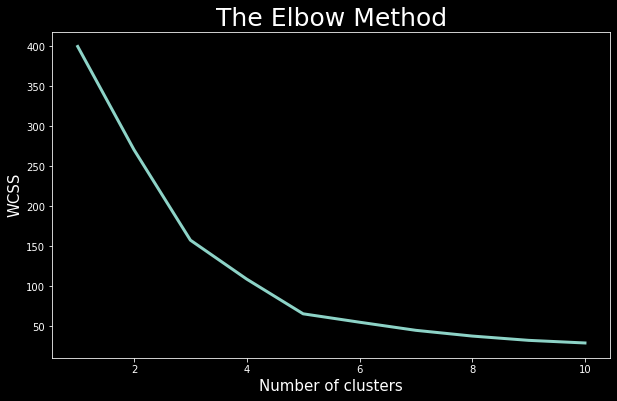

In [164]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15 )
plt.show()

The above figure shows that cluster=5 would be the most optimal cluster.

In [165]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X_scaled)

In [166]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [167]:
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

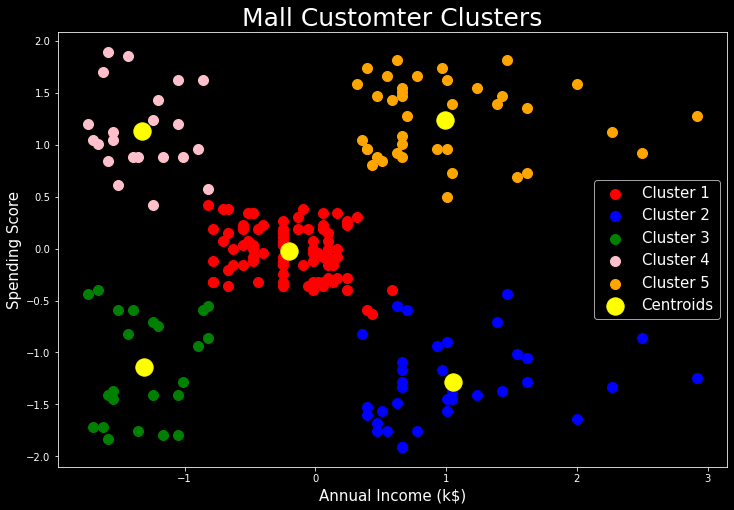

In [168]:
plt.figure(figsize = (12,8))
plt.scatter(X_scaled[y_pred == 0, 0], X_scaled[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_pred == 2, 0], X_scaled[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_pred == 3, 0], X_scaled[y_pred == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X_scaled[y_pred == 4, 0], X_scaled[y_pred == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Mall Customter Clusters', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [169]:
print(f'Silhouette Score(n = 5) : {silhouette_score(X_scaled, y_pred)}')
print(f'CH-Index(n = 5) : {sklearn.metrics.calinski_harabasz_score(X_scaled, y_pred)}')

Silhouette Score(n = 5) : 0.5546571631111091
CH-Index(n = 5) : 248.64932001536357


# Hierarchical Clustering

## Use dendrogram method to find the optimal number of clusters

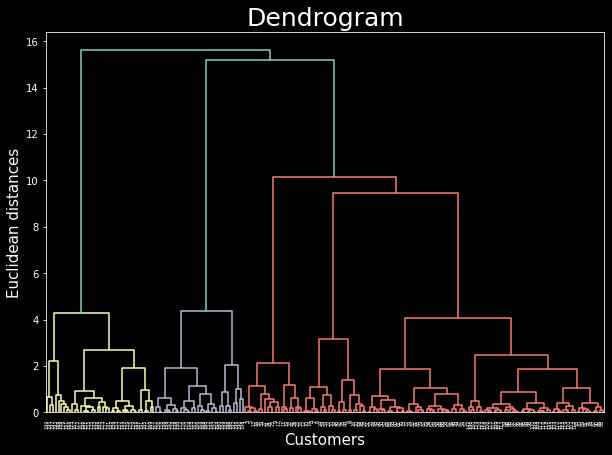

In [170]:
plt.figure(figsize = (10,7))
linkage_data = linkage(X_scaled, method='ward', metric='euclidean') 
Dendrogram = dendrogram(linkage_data)
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

The dendrogram shows that 5 would be most optimal cluster for this dataset.

In [171]:
hc = AgglomerativeClustering(n_clusters = 5) 
y_pred = hc.fit_predict(X_scaled)

In [172]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

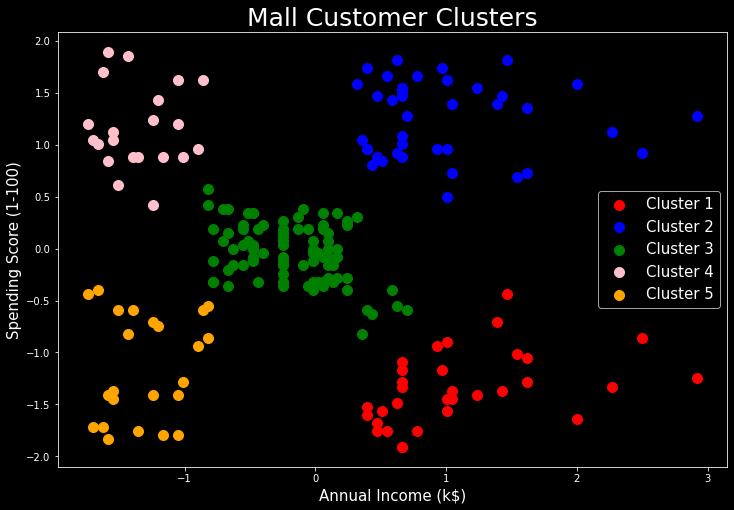

In [173]:
plt.figure(figsize = (12,8))
plt.scatter(X_scaled[y_pred == 0, 0], X_scaled[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_pred == 2, 0], X_scaled[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_pred == 3, 0], X_scaled[y_pred == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X_scaled[y_pred == 4, 0], X_scaled[y_pred == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.title('Mall Customer Clusters', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [174]:
print(f'Silhouette Score(n = 5) : {silhouette_score(X_scaled, y_pred)}')
print(f'CH-Index(n = 5) : {sklearn.metrics.calinski_harabasz_score(X_scaled, y_pred)}')

Silhouette Score(n = 5) : 0.5538089226688662
CH-Index(n = 5) : 244.41032586596822


# DBSCAN

## Selecting Value of Epsilon

In [175]:
outliers = []
eps_range = np.linspace(0.001,1,1000)

for eps in eps_range:
    
    dbscan = DBSCAN(eps=eps)
    y_pred = dbscan.fit_predict(X_scaled)
    
    points = 100 * np.sum(y_pred == -1)/len(y_pred)
    
    outliers.append(points)

Text(0.5, 1.0, 'Selecting Values of Epsilon')

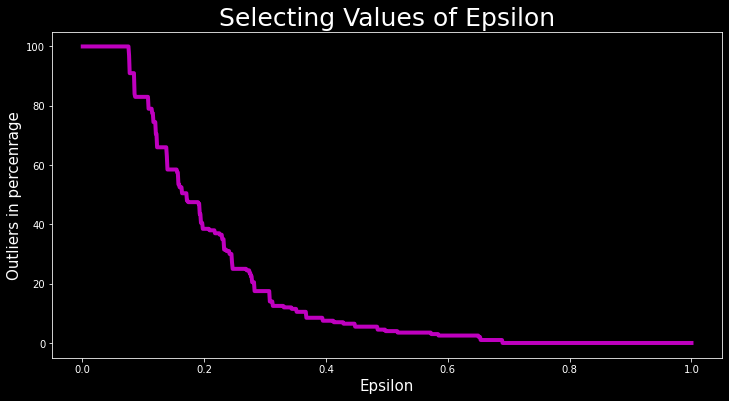

In [176]:
plt.figure(figsize = (12,6))
plt.plot( eps_range, outliers,'m', lw = 4)
plt.ylabel("Outliers in percenrage", fontsize = 15)
plt.xlabel("Epsilon", fontsize = 15)
plt.title("Selecting Values of Epsilon", fontsize = 25)

## For eps=0.4

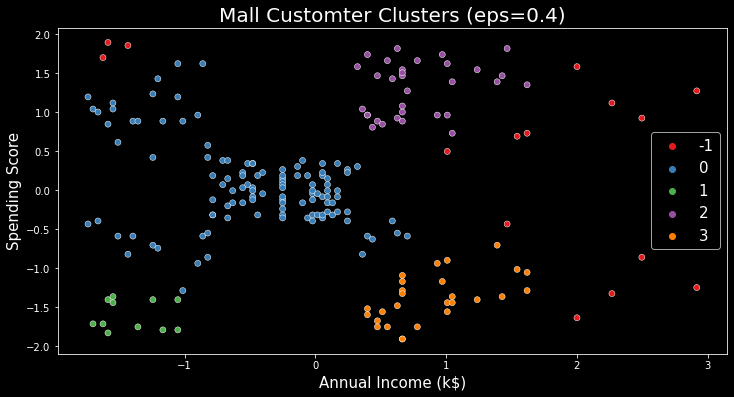

In [177]:
dbscan = DBSCAN(eps=0.4)
y_pred = dbscan.fit_predict(X_scaled)
plt.figure(figsize = (12,6))
sns.scatterplot(data = X_scaled, x = X_scaled[:,0],y = X_scaled[:,1] ,hue = y_pred ,palette = 'Set1')
plt.title('Mall Customter Clusters (eps=0.4)', fontsize = 20)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [178]:
print(f'Silhouette Score(eps=0.4) : {silhouette_score(X_scaled, y_pred)}')
print(f'CH-Index(eps=0.4) : {calinski_harabasz_score(X_scaled, y_pred)}')

Silhouette Score(eps=0.4) : 0.41325830390002166
CH-Index(eps=0.4) : 83.80925792320795


## For eps=0.5

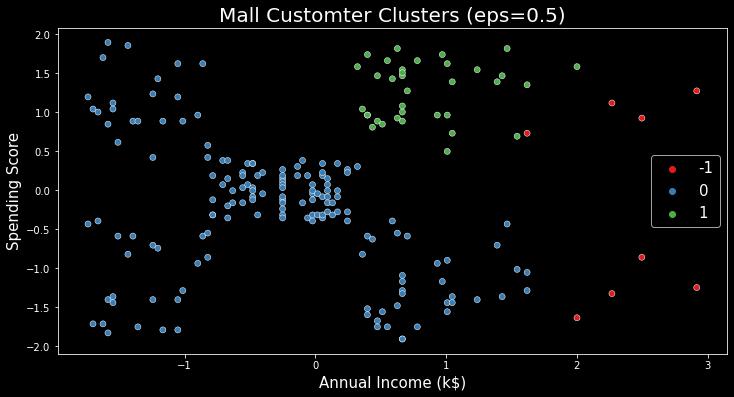

In [179]:
dbscan = DBSCAN(eps=0.5)
y_pred = dbscan.fit_predict(X_scaled)
plt.figure(figsize = (12,6))
sns.scatterplot(data = X_scaled, x = X_scaled[:,0],y = X_scaled[:,1] ,hue = y_pred ,palette = 'Set1')
plt.title('Mall Customter Clusters (eps=0.5)', fontsize = 20)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [180]:
print(f'Silhouette Score(eps=0.5) : {silhouette_score(X_scaled, y_pred)}')
print(f'CH-Index(eps=0.5) : {calinski_harabasz_score(X_scaled, y_pred)}')

Silhouette Score(eps=0.5) : 0.35044619989666004
CH-Index(eps=0.5) : 60.838816010569076


## For eps=0.6

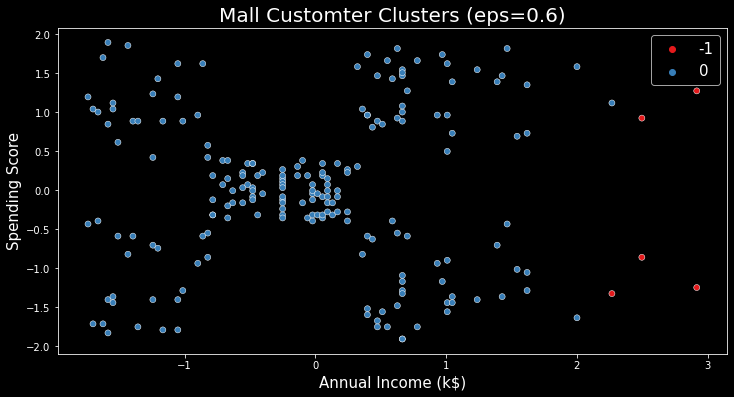

In [181]:
dbscan = DBSCAN(eps=0.6)
y_pred = dbscan.fit_predict(X_scaled)
plt.figure(figsize = (12,6))
sns.scatterplot(data = X_scaled, x = X_scaled[:,0],y = X_scaled[:,1] ,hue = y_pred ,palette = 'Set1')
plt.title('Mall Customter Clusters (eps=0.6)', fontsize = 20)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [182]:
print(f'Silhouette Score(eps=0.6) : {silhouette_score(X_scaled, y_pred)}')
print(f'CH-Index(eps=0.6) : {calinski_harabasz_score(X_scaled, y_pred)}')

Silhouette Score(eps=0.6) : 0.42136463110237615
CH-Index(eps=0.6) : 19.29424517124336


# Discussion

- When eps=0.4, the CH-Index is 83.80 (the highest CH-Index), and the Silhouette Score is 0.4132.
- When eps=0.6, the CH-Index is 19.29, and the Silhouette Score is 0.4213 (the highest Silhouette Score). 
- By Comparing the clustering performance between eps=0.4. and eps=0.6, the results show that eps=0.4 has a better cllustering performance than eps=0.6. This is evident from the significantly higher CH-Index for eps=0.4 compared to eps=0.6, while the Silhouette Score is only slightly lower for eps=0.4.
- Overall, K-means clustering in this dataset has a better clustering result compare to Hierarchical Clustering and DBSCAN clustering. 